<h1> APS2 </h1>

- Análise bivariada, como dois indicadores se relacionam.



Na parte 1 da APS, utilizamos o indicador "Government expenditure on education, total (% of GDP)" na análise. Já na parte 2, levamos em consideração também o indicador "Unemployment, total (% of total labor force) (modeled ILO estimate)" para assim, poder análisar o grau de relação entre esses dois indicadores. Antes da análise, pressupomos que esses indicadores teriam uma forte correlação já que, como a educação é uma das principais bases da sociedade, se não a principal, consequentemente um país que realiza um investimento maior neste setor teria uma taxa de desemprego menor, já que existiriam mais pessoas capacitadas para fazer parte do mercado de trabalho. Contrariamente, um país que não possui um investimento tão grande no setor da educação teria uma taxa de desemprego maior.
Após a análise, foi possível concluir que as nossa hipótese não estava tão correta como imaginávamos. Dentre os três Países analisados, a Noruega monstrou uma correlação 0.65 entre os indicadores, sendo assim é possível observar que esses indicadores de fato possuem um boa medida de relação nesse País, porém a medida que um indicador cresce ou decresce o outro tende a se comportar de forma semelhante de acordo com a correlação de 0.65. Nos casos do Brasil e do Afeganistão a correlação foi baixa, 0.20 e - 0.02 respectivamente, ilustrando que nesses Países o grau de relação dos dois indicadores é baixo, . Após essas observações, fica evidente a importâncaia de uma análise fundamentada em dados, ao passo que apenas pela análise superficial estávamos tendendo a acreditar em uma forte relação dos indicadores em todos os três Países e no casos do Brasil e Afeganistão as correlações foram próximas a zero, e na Noruega onde a correlação se apresentou mais elevada, esperávamos que a correlação fosse negativa, para que um indicador apresentasse movimento oposto ao outro.

Dados:     

Noruega  Correlação: 0.654306, Covariância: 0.242443

Brasil Correlação: 0.204663, Covariância: 0.286128

Afeganistão Correlação: -0.027527, Covariância: 0.010846


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anos= []

for ano in range(2003,2019):
    anos.append(str(ano))


df_edu = pd.read_csv('dados/government_expenditure/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4, decimal='.')
df_edu_nor = df_edu.iloc[177]
df_edu_bra = df_edu.iloc[29]
df_edu_afe = df_edu.iloc[2]

df_desem = pd.read_csv('dados/desemprego/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_4488595.csv', skiprows=4, decimal='.')

df_desem_nor = df_desem.iloc[177]
df_desem_bra = df_desem.iloc[29]
df_desem_afe = df_desem.iloc[2]

all_nor = pd.concat((df_desem_nor, df_edu_nor), join='outer', axis=1)
all_bra = pd.concat((df_desem_bra, df_edu_bra), join='outer', axis=1)
all_afe = pd.concat((df_desem_afe, df_edu_afe), join='outer', axis=1)

# manipulação de data frame

all_nor = all_nor.transpose()
all_bra = all_bra.transpose()
all_afe = all_afe.transpose()



lista_norway1 = []
lista_norway2 = []

lista_brasil1 = []
lista_brasil2 = []

lista_afeg1 = []
lista_afeg2 = []



lista_anos = list(range(2003,2019))




data_norway1 = all_nor[all_nor['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_norway2 = all_nor[all_nor['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']

data_brasil1 = all_bra[all_bra['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_brasil2 = all_bra[all_bra['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']

data_afeg1 = all_afe[all_afe['Indicator Code'] == 'SL.UEM.TOTL.ZS']
data_afeg2 = all_afe[all_afe['Indicator Code'] == 'SE.XPD.TOTL.GD.ZS']


for ano in lista_anos:
    lista_norway1.append(data_norway1[str(ano)])
    lista_norway2.append(data_norway2[str(ano)])

    lista_brasil1.append(data_brasil1[str(ano)])
    lista_brasil2.append(data_brasil2[str(ano)])

    lista_afeg1.append(data_afeg1[str(ano)])
    lista_afeg2.append(data_afeg2[str(ano)])


/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/1569335007.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_norway1, "r--", color= 'red', label= 'Desemprego - Noruega')
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/1569335007.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_brasil1, "r--", color= 'blue', label= 'Desemprego - Brasil')
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/1569335007.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lista_anos, lista_afeg1, "r--", color= 'orange', label= 'Desemprego - Afeganistão')


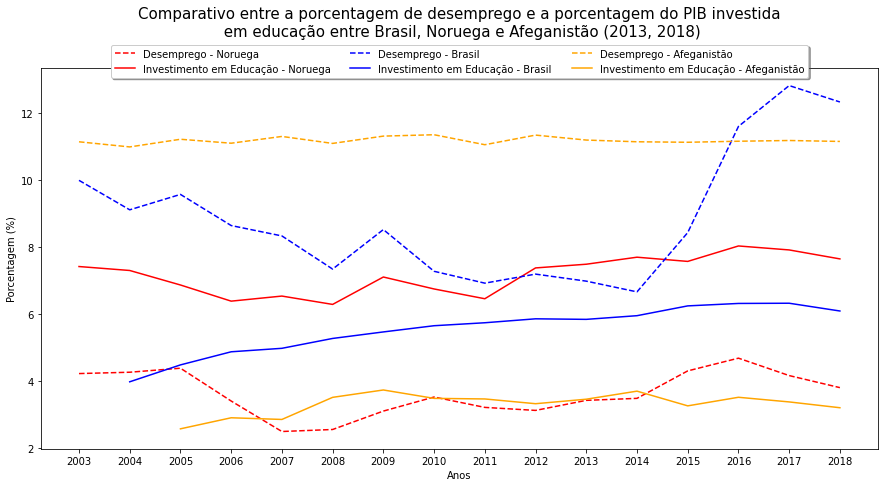

In [2]:
plt.style.use('default')
plt.figure(figsize=(15,7))
plt.plot(lista_anos, lista_norway1, "r--", color= 'red', label= 'Desemprego - Noruega')
plt.plot(lista_anos, lista_norway2, color= 'red', label= 'Investimento em Educação - Noruega')
plt.plot(lista_anos, lista_brasil1, "r--", color= 'blue', label= 'Desemprego - Brasil')
plt.plot(lista_anos, lista_brasil2, color= 'blue', label= 'Investimento em Educação - Brasil')
plt.plot(lista_anos, lista_afeg1, "r--", color= 'orange', label= 'Desemprego - Afeganistão')
plt.plot(lista_anos, lista_afeg2, color= 'orange', label= 'Investimento em Educação - Afeganistão')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.075), ncol=3, fancybox=True, shadow=True)
plt.title('Comparativo entre a porcentagem de desemprego e a porcentagem do PIB investida\n em educação entre Brasil, Noruega e Afeganistão (2013, 2018)', y=1.07, fontsize=15)
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.xticks(range(2003, 2019))
plt.show()



In [3]:
# norway
df_nor_edu = df_edu[df_edu['Country Name'] == 'Norway']

df_nor_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_nor_edu.drop(str(i), axis=1, inplace=True)
df_nor_edu.drop(['2019','2020','2021'], axis=1, inplace=True)
df_nor_edu = df_nor_edu.set_index('Country Name')
df_nor_edu = df_nor_edu.transpose()




df_nor_desem = df_desem[df_desem['Country Name'] == 'Norway']
df_nor_desem.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_nor_desem.drop(str(i), axis=1, inplace=True)
df_nor_desem.drop(['2019','2020','2021'], axis=1, inplace=True)
df_nor_desem = df_nor_desem.set_index('Country Name')
df_nor_desem = df_nor_desem.transpose()
df_nor_desem.head()


nor_merge = pd.concat((df_nor_desem, df_nor_edu), join='outer', axis=1)


nor_merge.cov()


/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/3788209941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nor_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/3788209941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nor_edu.drop(str(i), axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/3788209941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

Country Name,Norway,Norway
Country Name,,
Norway,0.432246,0.242443
Norway,0.242443,0.317634


In [4]:
# Brasil
df_bra_edu = df_edu[df_edu['Country Name'] == 'Brazil']

df_bra_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_bra_edu.drop(str(i), axis=1, inplace=True)
df_bra_edu.drop(['2019','2020','2021'], axis=1, inplace=True)
df_bra_edu = df_bra_edu.set_index('Country Name')
df_bra_edu = df_bra_edu.transpose()




df_bra_desem = df_desem[df_desem['Country Name'] == 'Brazil']
df_bra_desem.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_bra_desem.drop(str(i), axis=1, inplace=True)
df_bra_desem.drop(['2019','2020','2021'], axis=1, inplace=True)
df_bra_desem = df_bra_desem.set_index('Country Name')
df_bra_desem = df_bra_desem.transpose()
df_bra_desem.head()


bra_merge = pd.concat((df_bra_desem, df_bra_edu), join='outer', axis=1)



bra_merge.cov()

/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/2134279295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bra_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/2134279295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bra_edu.drop(str(i), axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_16781/2134279295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

Country Name,Brazil,Brazil
Country Name,,
Brazil,3.830393,0.286128
Brazil,0.286128,0.487889


In [297]:
# Afeganistão

df_afg_edu = df_edu[df_edu['Country Name'] == 'Afghanistan']
df_afg_edu.head()

df_afg_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_afg_edu.drop(str(i), axis=1, inplace=True)

df_afg_edu.drop(['2019','2020','2021'], axis=1, inplace=True)
df_afg_edu = df_afg_edu.set_index('Country Name')
df_afg_edu = df_afg_edu.transpose()




df_afg_desem = df_desem[df_desem['Country Name'] == 'Afghanistan']
df_afg_desem.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
for i in range(1960, 2003):
    df_afg_desem.drop(str(i), axis=1, inplace=True)
df_afg_desem.drop(['2019','2020','2021'], axis=1, inplace=True)
df_afg_desem = df_afg_desem.set_index('Country Name')
df_afg_desem = df_afg_desem.transpose()



afg_merge = pd.concat((df_afg_desem, df_afg_edu), join='outer', axis=1)



afg_merge.cov()

/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_10387/3563688617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afg_edu.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_10387/3563688617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afg_edu.drop(str(i), axis=1, inplace=True)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_10387/3563688617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

Country Name,Afghanistan,Afghanistan
Country Name,,
Afghanistan,0.010846,-0.000881
Afghanistan,-0.000881,0.109594


In [305]:
nor_merge.corr()

Country Name,Norway,Norway
Country Name,,
Norway,1.000000,0.654306
Norway,0.654306,1.000000


In [304]:
bra_merge.corr()

Country Name,Brazil,Brazil
Country Name,,
Brazil,1.000000,0.204663
Brazil,0.204663,1.000000


In [303]:
afg_merge.corr()

Country Name,Afghanistan,Afghanistan
Country Name,,
Afghanistan,1.000000,-0.027527
Afghanistan,-0.027527,1.000000
